<a href="https://colab.research.google.com/github/19522224/CS114.L21/blob/master/scoreprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


In [4]:
import sqlite3

conn = sqlite3.connect('Driver={SQL Server};'
                      'Server=RON\SQLEXPRESS;'
                      'Database=TestDB;'
                      'Trusted_Connection=yes;')
cursor = conn.cursor()

In [6]:
score=pd.read_excel('./score_training.xlsx')
score.head()

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05


In [31]:
score.to_sql('SCORE', conn, if_exists='replace', index=False)
data_score=pd.DataFrame(cur.execute('SELECT id, CK FROM SCORE  GROUP BY id'))


,0,1
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5


In [64]:
data_score.rename(columns = {list(data_score)[0]:'user_id'}, inplace=True)
data_score.rename(columns = {list(data_score)[1]:'CK'}, inplace=True)
data_score.head(50)

,user_id,CK
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5
5,30,9
6,34,6.5
7,35,4.5
8,36,7
9,37,7.5


In [7]:
wecode=pd.read_excel('./wecode.xlsx')
wecode.head()

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07


In [8]:
wecode.describe()
wecode.to_sql('WECODE', conn, if_exists='replace', index=False)

In [9]:
cur = conn.cursor()
# Fetch and display result
  ## tổng problem của từng người
for row in cur.execute('SELECT user_id, COUNT(DISTINCT problem_id) AS sum_problem FROM wecode GROUP BY user_id'):
    print(row)

(1, 2)
(4, 41)
(5, 5)
(6, 88)
(7, 2)
(11, 18)
(14, 7)
(15, 50)
(20, 12)
(24, 78)
(27, 5)
(29, 80)
(31, 3)
(34, 84)
(35, 147)
(37, 102)
(40, 191)
(41, 71)
(42, 181)
(43, 98)
(45, 66)
(47, 67)
(48, 25)
(49, 99)
(51, 39)
(52, 100)
(53, 129)
(55, 86)
(57, 87)
(59, 8)
(64, 25)
(65, 60)
(67, 29)
(68, 170)
(69, 1)
(70, 99)
(72, 71)
(76, 29)
(77, 44)
(80, 186)
(83, 104)
(85, 93)
(87, 105)
(88, 73)
(89, 90)
(90, 207)
(91, 95)
(93, 54)
(94, 6)
(96, 94)
(97, 81)
(98, 144)
(101, 188)
(102, 96)
(103, 88)
(104, 95)
(105, 66)
(109, 101)
(114, 80)
(116, 96)
(119, 41)
(122, 6)
(124, 94)
(125, 157)
(126, 108)
(131, 88)
(133, 55)
(135, 93)
(140, 26)
(141, 180)
(143, 95)
(145, 99)
(146, 56)
(148, 24)
(149, 91)
(150, 186)
(158, 98)
(160, 100)
(161, 44)
(163, 86)
(164, 12)
(165, 161)
(166, 28)
(167, 94)
(170, 106)
(171, 47)
(175, 59)
(179, 83)
(180, 103)
(181, 26)
(182, 84)
(184, 147)
(185, 21)
(187, 90)
(188, 132)
(189, 67)
(190, 33)
(193, 164)
(194, 86)
(195, 55)
(198, 149)
(199, 98)
(200, 90)
(202, 98)
(

In [10]:
  ## số test sai của từng người(chưa full điểm và Error)
for row in cur.execute('SELECT user_id, COUNT(*) AS sum_wrong_test FROM wecode WHERE pre_score < 10000 GROUP BY user_id'):
    print(row)

(1, 1)
(4, 10)
(5, 3)
(6, 41)
(7, 5)
(11, 31)
(14, 15)
(15, 45)
(20, 1)
(24, 84)
(27, 9)
(29, 124)
(31, 10)
(34, 137)
(35, 145)
(37, 212)
(40, 437)
(41, 46)
(42, 132)
(43, 273)
(45, 105)
(47, 116)
(48, 7)
(49, 212)
(51, 46)
(52, 252)
(53, 292)
(55, 124)
(57, 176)
(59, 19)
(64, 34)
(65, 114)
(67, 42)
(68, 252)
(69, 4)
(70, 195)
(72, 79)
(76, 30)
(77, 106)
(80, 328)
(83, 380)
(85, 48)
(87, 267)
(88, 118)
(89, 150)
(90, 301)
(91, 64)
(93, 75)
(94, 15)
(96, 86)
(97, 73)
(98, 436)
(101, 555)
(102, 80)
(103, 146)
(104, 342)
(105, 139)
(109, 331)
(114, 407)
(116, 125)
(119, 14)
(122, 26)
(124, 171)
(125, 297)
(126, 254)
(131, 84)
(133, 366)
(135, 143)
(140, 28)
(141, 385)
(143, 193)
(145, 170)
(146, 61)
(148, 43)
(149, 126)
(150, 266)
(158, 156)
(160, 307)
(161, 27)
(163, 134)
(164, 38)
(165, 375)
(166, 10)
(167, 149)
(170, 315)
(171, 23)
(175, 62)
(179, 119)
(180, 188)
(181, 39)
(182, 56)
(184, 197)
(185, 41)
(187, 156)
(188, 156)
(189, 67)
(190, 63)
(193, 205)
(194, 54)
(195, 58)
(198, 92)


In [11]:
  ## số test đúng của từng người
for row in cur.execute('SELECT user_id, COUNT(*) AS sum_wrong_test FROM wecode WHERE pre_score = 10000 GROUP BY user_id'):
    print(row)

(1, 1)
(4, 44)
(5, 3)
(6, 89)
(11, 19)
(14, 7)
(15, 56)
(20, 12)
(24, 80)
(27, 4)
(29, 75)
(31, 3)
(34, 81)
(35, 152)
(37, 100)
(40, 227)
(41, 64)
(42, 192)
(43, 175)
(45, 56)
(47, 70)
(48, 19)
(49, 101)
(51, 40)
(52, 97)
(53, 108)
(55, 84)
(57, 147)
(59, 7)
(64, 21)
(65, 72)
(67, 23)
(68, 178)
(70, 101)
(72, 66)
(76, 28)
(77, 34)
(80, 192)
(83, 110)
(85, 117)
(87, 124)
(88, 53)
(89, 85)
(90, 229)
(91, 89)
(93, 54)
(94, 2)
(96, 92)
(97, 79)
(98, 129)
(101, 183)
(102, 92)
(103, 94)
(104, 146)
(105, 45)
(109, 183)
(114, 61)
(116, 96)
(119, 42)
(122, 4)
(124, 92)
(125, 182)
(126, 129)
(131, 87)
(133, 51)
(135, 96)
(140, 27)
(141, 185)
(143, 99)
(145, 90)
(146, 56)
(148, 19)
(149, 90)
(150, 183)
(158, 107)
(160, 94)
(161, 41)
(163, 87)
(164, 5)
(165, 172)
(166, 22)
(167, 88)
(170, 108)
(171, 48)
(175, 55)
(179, 113)
(180, 101)
(181, 25)
(182, 80)
(184, 150)
(185, 14)
(187, 92)
(188, 131)
(189, 65)
(190, 29)
(193, 188)
(194, 86)
(195, 47)
(198, 150)
(199, 162)
(200, 90)
(202, 168)
(204, 87)

In [12]:
  ## số test bị lỗi (Compilation Error) của từng người
for row in cur.execute('SELECT user_id, COUNT(*) AS sum_error_test FROM wecode WHERE (status = "Compilation Error" OR status = "Error") GROUP BY user_id'):
    print(row)

(1, 1)
(4, 6)
(5, 2)
(6, 25)
(11, 7)
(14, 2)
(15, 25)
(20, 1)
(24, 33)
(29, 28)
(34, 16)
(35, 51)
(37, 62)
(40, 112)
(41, 5)
(42, 34)
(43, 118)
(45, 24)
(47, 42)
(48, 3)
(49, 126)
(51, 27)
(52, 66)
(53, 123)
(55, 62)
(57, 35)
(59, 13)
(64, 13)
(65, 35)
(67, 24)
(68, 47)
(70, 80)
(72, 40)
(76, 13)
(77, 31)
(80, 116)
(83, 103)
(85, 19)
(87, 153)
(88, 33)
(89, 47)
(90, 65)
(91, 24)
(93, 20)
(94, 8)
(96, 38)
(97, 15)
(98, 123)
(101, 100)
(102, 23)
(103, 32)
(104, 109)
(105, 33)
(109, 86)
(114, 137)
(116, 23)
(119, 8)
(122, 10)
(124, 85)
(125, 108)
(126, 53)
(131, 45)
(133, 145)
(135, 41)
(140, 15)
(141, 91)
(143, 73)
(145, 39)
(146, 29)
(148, 20)
(149, 51)
(150, 56)
(158, 37)
(160, 78)
(161, 16)
(163, 49)
(164, 24)
(165, 81)
(166, 8)
(167, 27)
(170, 94)
(171, 10)
(175, 9)
(179, 24)
(180, 40)
(181, 15)
(182, 21)
(184, 67)
(185, 21)
(187, 49)
(188, 64)
(189, 11)
(190, 30)
(193, 125)
(194, 20)
(195, 31)
(198, 22)
(199, 38)
(200, 29)
(202, 86)
(204, 39)
(205, 51)
(206, 34)
(207, 15)
(213, 73)


In [14]:
  ##  1 problem thì mỗi sinh viên nộp bao nhiêu bài test
for row in cur.execute('SELECT user_id, SUM(sum_test) FROM (SELECT user_id, assignment_id, problem_id, COUNT(*) AS sum_test FROM wecode GROUP BY user_id, problem_id, assignment_id) GROUP BY user_id'):
    print(row)


(1, 2)
(4, 54)
(5, 6)
(6, 130)
(7, 5)
(11, 50)
(14, 22)
(15, 101)
(20, 13)
(24, 164)
(27, 13)
(29, 199)
(31, 13)
(34, 218)
(35, 297)
(37, 312)
(40, 664)
(41, 110)
(42, 324)
(43, 448)
(45, 161)
(47, 186)
(48, 26)
(49, 313)
(51, 86)
(52, 349)
(53, 400)
(55, 208)
(57, 323)
(59, 26)
(64, 55)
(65, 186)
(67, 65)
(68, 430)
(69, 4)
(70, 296)
(72, 145)
(76, 58)
(77, 140)
(80, 520)
(83, 490)
(85, 165)
(87, 391)
(88, 171)
(89, 235)
(90, 530)
(91, 153)
(93, 129)
(94, 17)
(96, 178)
(97, 152)
(98, 565)
(101, 738)
(102, 172)
(103, 240)
(104, 488)
(105, 184)
(109, 514)
(114, 468)
(116, 221)
(119, 56)
(122, 30)
(124, 263)
(125, 479)
(126, 383)
(131, 171)
(133, 417)
(135, 239)
(140, 55)
(141, 570)
(143, 292)
(145, 260)
(146, 117)
(148, 62)
(149, 216)
(150, 449)
(158, 263)
(160, 401)
(161, 68)
(163, 221)
(164, 43)
(165, 547)
(166, 32)
(167, 237)
(170, 423)
(171, 71)
(175, 117)
(179, 232)
(180, 289)
(181, 64)
(182, 136)
(184, 347)
(185, 55)
(187, 248)
(188, 287)
(189, 132)
(190, 92)
(193, 393)
(194, 140)


In [16]:
  ## điểm số của những bài test được nộp cuối cùng(những bài test dc lấy điểm chấm cuối cùng)
for row in cur.execute('SELECT user_id, SUM(pre_score) FROM wecode WHERE is_final = 1 GROUP BY user_id'):
    print(row)

(1, 10000)
(4, 370000)
(5, 30000)
(6, 850000)
(7, 9209)
(11, 100316)
(14, 68000)
(15, 458666)
(20, 120000)
(24, 750299)
(27, 39000)
(29, 762760)
(31, 30000)
(34, 822888)
(35, 1477000)
(37, 979712)
(40, 2111388)
(41, 636888)
(42, 1925142)
(43, 1541357)
(45, 601388)
(47, 666000)
(48, 225285)
(49, 984602)
(51, 380000)
(52, 973888)
(53, 1159627)
(55, 827888)
(57, 1399776)
(59, 70000)
(64, 229285)
(65, 622000)
(67, 262888)
(68, 1849587)
(69, 0)
(70, 940077)
(72, 669500)
(76, 280000)
(77, 385533)
(80, 1869978)
(83, 1035978)
(85, 1179388)
(87, 1154120)
(88, 647065)
(89, 877939)
(90, 2275904)
(91, 896363)
(93, 516000)
(94, 20000)
(96, 880000)
(97, 778288)
(98, 1315144)
(101, 1830318)
(102, 944173)
(103, 964776)
(104, 1449852)
(105, 516370)
(109, 1699776)
(114, 707694)
(116, 956266)
(119, 400000)
(122, 47000)
(124, 920745)
(125, 1607565)
(126, 1085882)
(131, 878888)
(133, 485500)
(135, 919288)
(140, 265000)
(141, 1779388)
(143, 918888)
(145, 928047)
(146, 574000)
(148, 186333)
(149, 887000)
(15

In [58]:
new_data=pd.DataFrame(cur.execute('SELECT user_id, COUNT(DISTINCT problem_id) AS sum_problem FROM wecode GROUP BY user_id'))
new_data.rename(columns = {list(new_data)[0]:'user_id'}, inplace=True)
new_data.rename(columns = {list(new_data)[1]:'sum_prob'}, inplace=True)
new_data.head()

,user_id,sum_prob
0,1,2
1,4,41
2,5,5
3,6,88
4,7,2


In [59]:
new_data['sum_score_test']=pd.DataFrame(cur.execute('SELECT COUNT(*) AS sum_wrong_test FROM wecode WHERE pre_score < 10000 GROUP BY user_id'))
new_data.head()

,user_id,sum_prob,sum_score_test
0,1,2,1
1,4,41,10
2,5,5,3
3,6,88,41
4,7,2,5


In [60]:
new_data['sum_error_test']=pd.DataFrame(cur.execute('SELECT COUNT(*) AS sum_error_test FROM wecode WHERE (status = "Compilation Error" OR status = "Error") GROUP BY user_id'))
new_data.head()

,user_id,sum_prob,sum_score_test,sum_error_test
0,1,2,1,1.0
1,4,41,10,6.0
2,5,5,3,2.0
3,6,88,41,25.0
4,7,2,5,7.0


In [61]:
new_data['sum_test']=pd.DataFrame(cur.execute('SELECT SUM(sum_test) FROM (SELECT user_id, assignment_id, problem_id, COUNT(*) AS sum_test FROM wecode GROUP BY user_id, problem_id, assignment_id) GROUP BY user_id'))
new_data.head()

,user_id,sum_prob,sum_score_test,sum_error_test,sum_test
0,1,2,1,1.0,2
1,4,41,10,6.0,54
2,5,5,3,2.0,6
3,6,88,41,25.0,130
4,7,2,5,7.0,5


In [62]:
new_data['total_score']=pd.DataFrame(cur.execute('SELECT SUM(pre_score) FROM wecode WHERE is_final = 1 GROUP BY user_id'))
new_data.head()

,user_id,sum_prob,sum_score_test,sum_error_test,sum_test,total_score
0,1,2,1,1.0,2,10000.0
1,4,41,10,6.0,54,370000.0
2,5,5,3,2.0,6,30000.0
3,6,88,41,25.0,130,850000.0
4,7,2,5,7.0,5,9209.0


In [63]:
 new_data=pd.merge(new_data,data_score,on='user_id',how='left')
 new_data.head(50)

,user_id,sum_prob,sum_score_test,sum_error_test,sum_test,total_score,CK
0,1,2,1,1.0,2,10000.0,NaN
1,4,41,10,6.0,54,370000.0,NaN
2,5,5,3,2.0,6,30000.0,NaN
3,6,88,41,25.0,130,850000.0,NaN
4,7,2,5,7.0,5,9209.0,NaN
5,11,18,31,2.0,50,100316.0,NaN
6,14,7,15,25.0,22,68000.0,NaN
7,15,50,45,1.0,101,458666.0,NaN
8,20,12,1,33.0,13,120000.0,NaN
9,24,78,84,28.0,164,750299.0,9.5


In [77]:
new_data['CK']=pd.to_numeric(new_data['CK'], errors='coerce')
new_data.head(50)

,user_id,sum_prob,sum_score_test,sum_error_test,sum_test,total_score,CK
0,1,2,1,1.0,2,10000.0,NaN
1,4,41,10,6.0,54,370000.0,NaN
2,5,5,3,2.0,6,30000.0,NaN
3,6,88,41,25.0,130,850000.0,NaN
4,7,2,5,7.0,5,9209.0,NaN
5,11,18,31,2.0,50,100316.0,NaN
6,14,7,15,25.0,22,68000.0,NaN
7,15,50,45,1.0,101,458666.0,NaN
8,20,12,1,33.0,13,120000.0,NaN
9,24,78,84,28.0,164,750299.0,9.5


In [76]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159 entries, 0 to 1158
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         1159 non-null   int64  
 1   sum_prob        1159 non-null   int64  
 2   sum_score_test  1159 non-null   int64  
 3   sum_error_test  1143 non-null   float64
 4   sum_test        1159 non-null   int64  
 5   total_score     1157 non-null   float64
 6   CK              806 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 72.4 KB


In [82]:
Is_notNull_data=new_data[pd.notnull(new_data['CK'])]


In [83]:
### chọn những giá trị có điểm cuối kì
Is_notNull_data.head(50)

,user_id,sum_prob,sum_score_test,sum_error_test,sum_test,total_score,CK
9,24,78,84,28.0,164,750299.0,9.5
10,27,5,9,16.0,13,39000.0,10.0
11,29,80,124,51.0,199,762760.0,8.5
13,34,84,137,112.0,218,822888.0,6.5
14,35,147,145,5.0,297,1477000.0,4.5
15,37,102,212,34.0,312,979712.0,7.5
16,40,191,437,118.0,664,2111388.0,8.0
17,41,71,46,24.0,110,636888.0,8.0
18,42,181,132,42.0,324,1925142.0,7.5
19,43,98,273,3.0,448,1541357.0,6.0


In [85]:
### chọn giá trị không có điểm cuối kì
Is_Null_data=new_data[pd.isnull(new_data['CK'])]

In [86]:
Is_Null_data.head()

,user_id,sum_prob,sum_score_test,sum_error_test,sum_test,total_score,CK
0,1,2,1,1.0,2,10000.0,NaN
1,4,41,10,6.0,54,370000.0,NaN
2,5,5,3,2.0,6,30000.0,NaN
3,6,88,41,25.0,130,850000.0,NaN
4,7,2,5,7.0,5,9209.0,NaN


# **Train Model**

## **Import Libraries**

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## **Processing data**

In [88]:
X=Is_notNull_data.drop(['user_id','CK'],axis=1)
y=Is_notNull_data['CK']

In [89]:
X.head()

,sum_prob,sum_score_test,sum_error_test,sum_test,total_score
9,78,84,28.0,164,750299.0
10,5,9,16.0,13,39000.0
11,80,124,51.0,199,762760.0
13,84,137,112.0,218,822888.0
14,147,145,5.0,297,1477000.0


In [90]:
y.head()

9      9.5
10    10.0
11     8.5
13     6.5
14     4.5
Name: CK, dtype: float64

## **Split training data and test data**

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## **Show on graph**

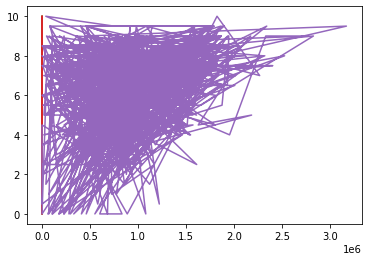

In [95]:
plt.plot(X,y)
plt.show()